In [3]:
%run setup.py

In [2]:
df = pd.read_csv('../data/all_confirmed_planets.csv')

/Users/danielhey/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (140,246) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


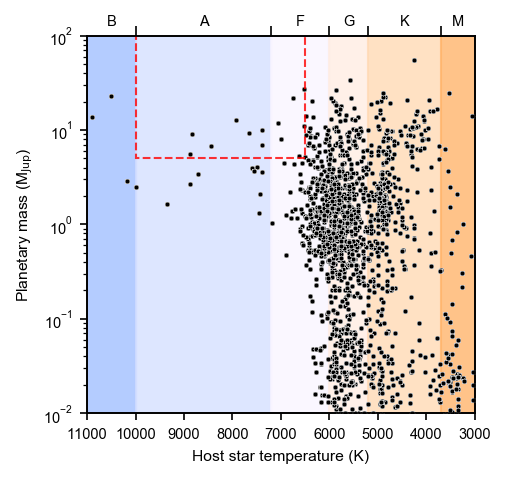

In [6]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=mnras_size(240., square=True))

mask = np.ones_like(df, dtype=bool)
ax.scatter((df[mask]['st_teff']), (df[mask]['pl_bmassj']), 5,facecolors='black', edgecolors='white', alpha=0.8, linewidth=0.2, rasterized=True, label='Confirmed', zorder=50)

# ax.set_yscale('log')
ax.set_xlabel('Host star temperature (K)')
ax.set_ylabel(r'Planetary mass (M$_{\rm Jup}$)')

# https://en.wikipedia.org/wiki/Stellar_classification#Harvard_spectral_classification
colors = np.array([
    [146,181,255],
    [162,192,255],
    [213,224,255],
    [249,245,255],
    [255,237,227],
    [255,218,181],
    [255,181,108]
]) / 255

classes = np.array([
    [30000, 50000],
    [10000,11000],
    [7200,10000],
    [6000,7200],
    [5200,6000],
    [3700,5200],
    [3000,3700]
])

for color, sptype in zip(colors, classes):
    ax.axvspan(sptype[0], sptype[1], color=color, zorder=1, alpha=0.8)

ax.set_xlim(11000,3000)
ax2 = ax.twiny()
ax2.set_xlim(11000,3000)

rect = Rectangle((6500,5), 10000-6500,10000, alpha=0.8, fill=False, color='red', linestyle='dashed', zorder=80)
ax.add_patch(rect)

# Major ticks
ticks2 = [3700,5200,6000,7200,10000]
ax2.set_xticks(ticks2)
ax2.set_xticklabels([])
ax2.tick_params(axis='x', which="major", length=5)
ax2.set_xlim(11000,3000)

# Minor ticks
ticks1 = np.average(classes, axis=1)
labs = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
ax2.set_xticks(ticks1, minor=True)
ax2.set_xticklabels(labs, minor=True)
ax2.tick_params(axis='x', which="minor",length=0)
ax2.set_xlim(11000,3000)

ax.set_yscale('log')
ax.set_ylim(10e-3, 100)
plt.savefig('pm_suitability.png', dpi=300, bbox_inches='tight', pad_inches=0)
# plt.savefig(overleaf_path + 'all_koi.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

In [37]:
np.unique(df['pl_discmethod'])

array(['Astrometry', 'Disk Kinematics', 'Eclipse Timing Variations',
       'Imaging', 'Microlensing', 'Orbital Brightness Modulation',
       'Pulsar Timing', 'Pulsation Timing Variations', 'Radial Velocity',
       'Transit', 'Transit Timing Variations'], dtype=object)